In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv('/content/train.csv', sep = ',')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(dataset.shape)

(891, 12)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset.isnull().sum().sort_values(ascending=False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [6]:
dataset = dataset.drop(['PassengerId','Name','Ticket', 'Cabin'], axis = 1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
dataset['Age'] = dataset.Age.fillna(dataset.groupby(['Pclass','Sex'])['Age'].transform('median'))

dataset.loc[dataset.Embarked.isnull(),'Embarked'] = dataset.Embarked.mode()[0]

dataset.loc[dataset.Fare.isnull(),'Fare'] = dataset.Fare.mean()

dataset['Family_Size'] = dataset['SibSp'] + dataset['Parch'] + 1

In [8]:
dataset.isnull().sum().sort_values(ascending=False).head(5)

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0


In [9]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [10]:
cont_sex = dataset.groupby(['Sex', 'Survived']).size().unstack()
cont_sex['Total'] = cont_sex.sum(axis=1)
porcent_sex = (cont_sex[1] / cont_sex['Total']) * 100
cont_sex['sobrevivevtes %'] = porcent_sex
mean_sex = dataset.groupby('Sex')['Survived'].mean()
cont_sex['Mean'] = mean_sex
print(cont_sex)

Survived    0    1  Total  sobrevivevtes %      Mean
Sex                                                 
female     81  233    314        74.203822  0.742038
male      468  109    577        18.890815  0.188908


In [11]:
mortes_por_pclass =dataset.groupby(['Pclass', 'Survived']).size().unstack()
mortes_por_pclass['Total'] = mortes_por_pclass.sum(axis=1)
porcent_mortes = (mortes_por_pclass[1] / mortes_por_pclass['Total']) * 100
mortes_por_pclass['sobreviventes %'] = porcent_mortes

print(mortes_por_pclass)

Survived    0    1  Total  sobreviventes %
Pclass                                    
1          80  136    216        62.962963
2          97   87    184        47.282609
3         372  119    491        24.236253


In [12]:
categorias = ['S', 'C', 'Q']
orc = OrdinalEncoder(categories=[categorias], dtype = 'int32')
orc = orc.fit(dataset[['Embarked']])
dataset['Embarked'] =orc.transform(dataset[['Embarked']])

In [13]:
dataset['sex_binario'] = dataset.Sex.apply(lambda x: 1 if x == 'male' else 0)
dataset = dataset.drop(['Sex'], axis = 1)
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Family_Size,sex_binario
0,0,3,22.0,1,0,7.2500,0,2,1
1,1,1,38.0,1,0,71.2833,1,2,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,2,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [14]:
print(dataset.shape)

(891, 9)


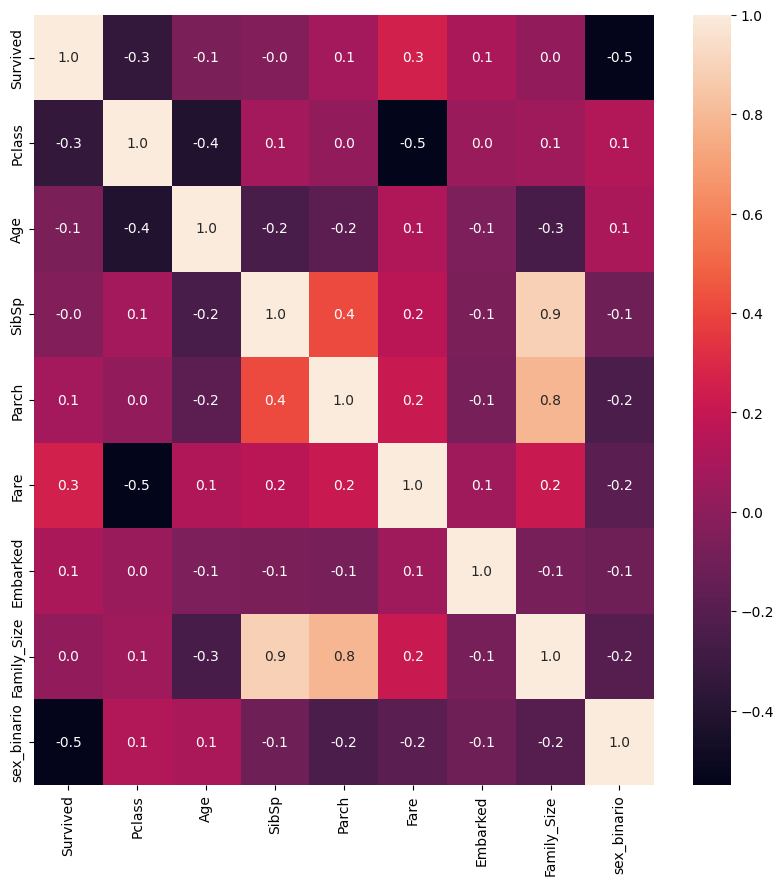

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True, fmt='.1f')
plt.show()

In [16]:
# Separando features (X) e rótulo (y)
X = dataset.drop('Survived', axis = 1)
y = dataset['Survived']


# Dividindo os dados em conjuntos de treinamento e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_norm, y_train_val, test_size=0.25, random_state=42)

print("\n--- Shape dos dados após as divisões ---")
print(f"Conjunto de Treinamento: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Conjunto de Validação: X_val.shape = {X_val.shape}, y_val.shape = {y_val.shape}")
print(f"Conjunto de Teste: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")


--- Shape dos dados após as divisões ---
Conjunto de Treinamento: X_train.shape = (534, 8), y_train.shape = (534,)
Conjunto de Validação: X_val.shape = (178, 8), y_val.shape = (178,)
Conjunto de Teste: X_test.shape = (179, 8), y_test.shape = (179,)


In [17]:
print("--- Distribuição das classes antes do balanceamento ---")
print(pd.Series(y_train).value_counts())

# Inicializando o SMOTE. O 'random_state' garante a reprodutibilidade.
smote = SMOTE(random_state=42)

# Aplicando o SMOTE APENAS aos dados de treino
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\n--- Distribuição das classes após o balanceamento com SMOTE ---")
print(pd.Series(y_train_res).value_counts())

--- Distribuição das classes antes do balanceamento ---
Survived
0    332
1    202
Name: count, dtype: int64

--- Distribuição das classes após o balanceamento com SMOTE ---
Survived
1    332
0    332
Name: count, dtype: int64


In [18]:
model = keras.Sequential([
    # A camada de entrada é a primeira camada densa
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),  # Adiciona uma camada de Dropout para evitar overfitting
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    # A camada de saída tem 1 neurônio e ativação 'sigmoid' para classificação binária
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Treinamento do modelo
print("\n--- Iniciando o treinamento do modelo ---")
history = model.fit(X_train_res, y_train_res,
                    epochs=200,
                    batch_size=16,
                    validation_data=(X_val, y_val),
                    verbose=0)


--- Iniciando o treinamento do modelo ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



--- Avaliação do Modelo ---
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Matriz de Confusão:


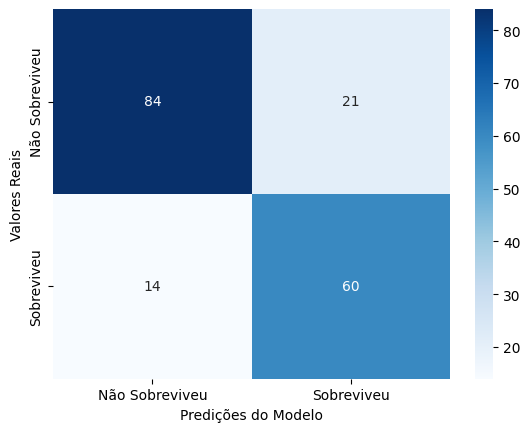


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       105
           1       0.74      0.81      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



In [19]:
print("\n--- Avaliação do Modelo ---")
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Matriz de Confusão e Relatório de Classificação
print("Matriz de Confusão:")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Valores Reais')
plt.xlabel('Predições do Modelo')
plt.show()

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

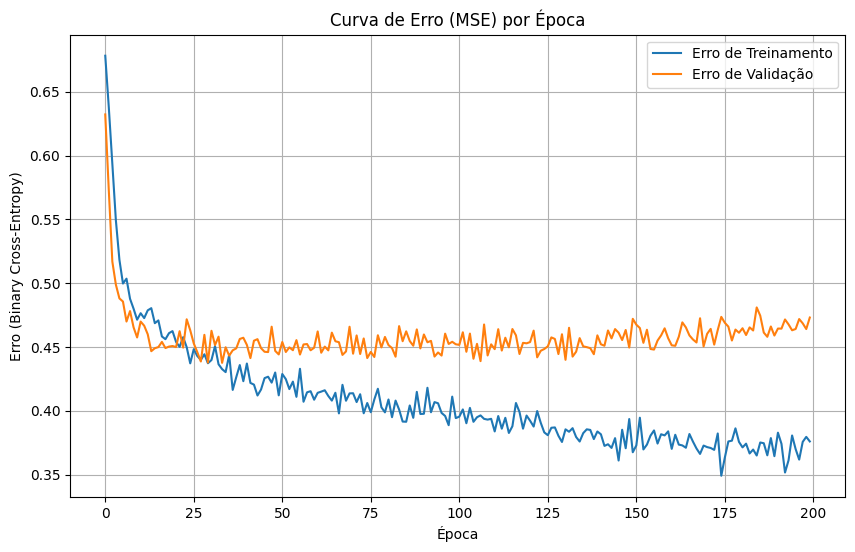

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.title('Curva de Erro (MSE) por Época')
plt.xlabel('Época')
plt.ylabel('Erro (Binary Cross-Entropy)')
plt.legend()
plt.grid(True)
plt.show()